### This practise is based on two datasets:

## International Airlines - Traffic by city pairs (city_pairs.csv) 
### This dataset contains information about international flights to and from Australia in monthly intervals from January 1985 until September 2022. The data is provided by the Australian Government and covers passenger, freight, and mail carried between city pairs connected by single flight number services. 

https://data.gov.au/data/dataset/international-airlines-traffic-by-city-pairs/resource/ebcafd83-9514-4f72-a995-fe7ee90cb9da 

## International Airlines - Operated Flights and Seats (seats.csv) 
### This dataset contains information about international airlines to and from Australia in monthly intervals from September 2003 until September 2022. The data is provided by the Australian Government and covers airline activity, airport locations, and maximum seat capacity. 

https://data.datahub.freightaustralia.gov.au/dataset/international-airlines-operated-flights-andseats



In [2]:
import pandas as pd

D:\0Code\0PythonFile\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
def log(question, output_df, other):
    print("--------------- {}----------------".format(question))

    if other is not None:
        print(question, other)
    if output_df is not None:
        df = output_df.head(5).copy(True)
        for c in df.columns:
            df[c] = df[c].apply(lambda a: a[:20] if isinstance(a, str) else a)

        df.columns = [a[:10] + "..." for a in df.columns]
        print(df.to_string())

###### Q1: Using the “city_pairs.csv” dataset, load it in a data frame and add three new columns to it. 
###### The values should be one of “IN”, “OUT”, or “SAME”, depending on whether inbound or outbound numbers are higher, or they are the same

In [4]:
df1 = pd.read_csv('city_pairs.csv')
# add new row
df1['passenger_in_out'] = df1.apply(lambda row: 'IN' if row['Passengers_In'] > row['Passengers_Out'] else 'OUT' if row['Passengers_In'] < row['Passengers_Out'] else 'SAME', axis=1)
df1['freight_in_out'] = df1.apply(lambda row: 'IN' if row['Freight_In_(tonnes)'] > row['Freight_Out_(tonnes)'] else 'OUT' if row['Freight_In_(tonnes)'] <row['Freight_Out_(tonnes)'] else 'SAME',axis=1)
df1['mail_in_out'] = df1.apply(lambda row: 'IN' if row['Mail_In_(tonnes)'] > row['Mail_Out_(tonnes)'] else 'OUT' if row['Mail_In_(tonnes)'] <row['Mail_Out_(tonnes)'] else 'SAME',axis=1)

    #################################################

log("QUESTION 1", output_df=df1[["AustralianPort", "ForeignPort", "passenger_in_out", "freight_in_out", "mail_in_out"]], other=df1.shape)

--------------- QUESTION 1----------------
QUESTION 1 (84464, 18)
  Australian... ForeignPor... passenger_... freight_in... mail_in_ou...
0      Adelaide      Auckland            IN            IN           OUT
1      Adelaide       Bahrain            IN           OUT          SAME
2      Adelaide        Bombay            IN          SAME          SAME
3      Adelaide     Frankfurt           OUT            IN           OUT
4      Adelaide        London            IN           OUT           OUT


###### Q2: Using the data frame from Question 1, create a new data frame with unique “AustralianPort” values and their total count of the “IN” or “OUT” labels derived in Question 1 for passengers, freight, and mail since January 1985 in separate columns. 
###### This must be sorted in order by "PassengerInCount” (highest to lowest). There is no need to include counts for “SAME”

In [5]:
df2 = pd.DataFrame({'AustralianPort': df1['AustralianPort'].unique()})

df2['PassengerInCount'] = df2['AustralianPort'].apply(lambda x: df1[(df1['AustralianPort']==x)&(df1['passenger_in_out']=='IN')].shape[0])
df2['PassengerOutCount'] = df2['AustralianPort'].apply(lambda x: df1[(df1['AustralianPort']==x)&(df1['passenger_in_out']=='OUT')].shape[0])
df2['FreightInCount'] = df2['AustralianPort'].apply(lambda x: df1[(df1['AustralianPort']==x)&(df1['freight_in_out']=='IN')].shape[0])
df2['FreightOutCount'] = df2['AustralianPort'].apply(lambda x: df1[(df1['AustralianPort']==x)&(df1['freight_in_out']=='OUT')].shape[0])
df2['MailInCount'] = df2['AustralianPort'].apply(lambda x: df1[(df1['AustralianPort']==x)&(df1['mail_in_out']=='IN')].shape[0])
df2['MailOutCount'] = df2['AustralianPort'].apply(lambda x: df1[(df1['AustralianPort']==x)&(df1['mail_in_out']=='OUT')].shape[0])

# sort by 'PassengerInCount'
df2 = df2.sort_values('PassengerInCount', ascending=False)

log("QUESTION 2", output_df=df2, other=df2.shape)

--------------- QUESTION 2----------------
QUESTION 2 (19, 7)
  Australian...  PassengerI...  PassengerO...  FreightInC...  FreightOut...  MailInCoun...  MailOutCou...
9        Sydney          10548          10994          12493           9112           9664           7225
5     Melbourne           7939           7311           7248           7591           6043           4457
1      Brisbane           6837           6686           3970           7201           2580           5348
7         Perth           4704           3604           2736           4341           2771           3671
2        Cairns           2986           3639           1585           3233            538           1553


###### Q3: Using the data frame from Question 1, create a new data frame with unique “Country” values and their average monthly passenger, freight, and mail values (including 2dp) for their respective "_In” and “_Out” columns separately. 
###### This must be sorted in ascending order by “Passengers_in_average” (lowest to highest). 
###### If a country does not appear in a month, they need to be considered as 0 and still contribute to the average.   

###### Take the following example input data frame which is from Jan 2022 to Feb 2022: 
Month AustralianPort ForeignPort PassengerIn PassengerOut Country ... 
Jan 2022 Sydney Shenzhen 10 20 China 
Jan 2022 Brisbane Toronto 5 10 Canada 
Jan 2022 Melbourne Singapore 8 12 Singapore 
Feb 2022 Adelaide Shenzhen 6 15 China 
Feb 2022 Sydney Montreal 1 25 Canada  
###### An example output data frame would be as follows: 
Country Passengers_in_average Passengers_out_average ... 
Canada (5 + 1) / 2 = 3.00 (10 + 25) / 2 = 17.50 
Singapore (8 + 0) / 2 = 4.00 (12 + 0) / 2 = 6.00 
China (10 + 6) / 2 = 8.00 (20 + 15) / 2 = 17.50

In [6]:
# df_temp = df1.groupby("Country")[["Passengers_In", "Passengers_Out", "Freight_In_(tonnes)", "Freight_Out_(tonnes)", "Mail_In_(tonnes)", "Mail_Out_(tonnes)"]]
# df_temp = df_temp.sum()/452
# df3 = pd.DataFrame({"Country": df_temp.index,
#                     "Passengers_in_average": df_temp["Passengers_In"],
#                     "Passengers_out_average": df_temp["Passengers_Out"],
#                     "Freight_in_average": df_temp["Freight_In_(tonnes)"],
#                     "Freight_out_average": df_temp["Freight_Out_(tonnes)"],
#                     "Mail_in_average": df_temp["Mail_In_(tonnes)"],
#                     "Mail_out_average": df_temp["Mail_Out_(tonnes)"]})
# df3 = df3.sort_values('Passengers_in_average', ascending=True)

# log("QUESTION 3", output_df=df3, other=df3.shape)

In [7]:
def format_date(date_str):
    month_temp = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    month,year = date_str.split('-')
    if int(year)>24:
        year = str(int(year)+1900)
    else:
        year = str(int(year)+2000)
    return year+'-'+str(month_temp.index(month)+1).zfill(2)

date_max = df1["Month"].apply(format_date).max()
date_min = df1["Month"].apply(format_date).min()
totol_month = (int(date_max.split('-')[0])-int(date_min.split('-')[0])-1)*12 + 12-int(date_min.split('-')[1]) + int(date_max.split('-')[1])+1

df_temp = df1.groupby("Country")[["Passengers_In", "Passengers_Out", "Freight_In_(tonnes)", "Freight_Out_(tonnes)", "Mail_In_(tonnes)", "Mail_Out_(tonnes)"]]
df_temp = df_temp.sum()/totol_month
df_temp = df_temp.round(2)
df3 = pd.DataFrame({"Passengers_in_average": df_temp["Passengers_In"],
                    "Passengers_out_average": df_temp["Passengers_Out"],
                    "Freight_in_average": df_temp["Freight_In_(tonnes)"],
                    "Freight_out_average": df_temp["Freight_Out_(tonnes)"],
                    "Mail_in_average": df_temp["Mail_In_(tonnes)"],
                    "Mail_out_average": df_temp["Mail_Out_(tonnes)"]})
df3 = df3.sort_values('Passengers_in_average', ascending=True).reset_index()

log("QUESTION 3", output_df=df3, other=df3.shape)

--------------- QUESTION 3----------------
QUESTION 3 (74, 7)
   Country...  Passengers...  Passengers...  Freight_in...  Freight_ou...  Mail_in_av...  Mail_out_a...
0  Kazakhstan            0.0            0.0           0.00           6.52            0.0            0.0
1     Nigeria            0.0            0.0           0.00           0.45            0.0            0.0
2     Ireland            0.0            0.0           0.00           0.06            0.0            0.0
3        Laos            0.0            0.0           0.00           0.60            0.0            0.0
4       Macau            0.0            0.0           0.12           1.71            0.0            0.0


###### Q4: Using the data frame from Question 1, create a new data frame with a descending (highest to lowest) column of the top 5 “Unique_ForeignPort_Count”. If the counts are the same for a country, use alphabetical order. 

“Unique_ForeignPort_Count” is the count where routes with at least 1 passenger exist (I.e. where 
passengers_out > 0) in a unique month from one unique “AustralianPort” to one unique “Country”, 
but with more than one “ForeignPort” used in that month by that “AustralianPort”. For example, if 
the input table had the below data, they would be counted as 5 separate occurrences:
 
1 Sydney to Dubai, United Arab Emirates in September 2022 
2 Sydney to Abu Dhabi, United Arab Emirates in September 2022 
 
1 Sydney to Dubai, United Arab Emirates in August 2022 
2 Sydney to Abu Dhabi, United Arab Emirates in August 2022 
 
1 Melbourne to Dubai, United Arab Emirates in August 2022 
2 Melbourne to Abu Dhabi, United Arab Emirates in August 2022 
 
1 Melbourne to Auckland, New Zealand in September 2022 
2 Auckland to Melbourne, New Zealand in September 2022 
3 Christchurch to Melbourne, New Zealand in September 2022 
4 Melbourne to Queenstown, New Zealand in September 2022 
5 Melbourne to Wellington, New Zealand in September 2022
(note – #3 and #4 could be ignored and the outcome will be the same, because inbound routes are 
disregarded) 

1 Brisbane to Shenzhen, China in November 2021 
2 Brisbane to Shanghai, China in November 2021 
 
1 Brisbane to Hong Kong, Hong Kong in November 2021 (Note – this is not counted as there is 
only one ForeignPort used in Hong Kong in this month) 


The output for the above would therefore be: 
Country Unique_ForeignPort_Count 
United Arab Emirates 3 
China 1 
New Zealand 1 




In [8]:
df4_temp = df1[df1['Passengers_Out'] > 0]
df4_temp2 = df4_temp.groupby(['AustralianPort', 'Country', 'Month']).ForeignPort.nunique().reset_index()
df4_temp2 = df4_temp2[df4_temp2['ForeignPort']>1]
df4_temp3 = df4_temp2.groupby('Country').size().reset_index(name='Unique_ForeignPort_Count')
df4 = df4_temp3.sort_values(['Unique_ForeignPort_Count','Country'],ascending=[False,True])
log("QUESTION 4", output_df=df4, other=df4.shape)

--------------- QUESTION 4----------------
QUESTION 4 (21, 2)
     Country...  Unique_For...
9   New Zealand           2145
5     Indonesia           1887
16          USA           1749
7         Japan           1336
2         China            860


###### Q5: Using the “seats.csv dataset”, load it in a data frame and add two new columns “Source_City” and “Destination_City” to it: 
If “In_Out” is “I”, then this flight is inbound to Australia. The “Source_City” is set to the 
“International_City” and the “Destination_City” is set to the “Australian_City”. 

If “In_Out” is “O”, then this flight is outbound from Australia. The “Source_City” is set to the 
“Australian_City” and the “Destination_City” is set to the “International_City”. 

Output: a data frame with all the columns you have loaded from “seats.csv” and the two new 
columns. The ordering should be preserved from the original CSV file. 


In [9]:
df5 = pd.read_csv('seats.csv')

df5['Source_City'] = df5.apply(lambda x: x['International_City'] if x['In_Out'] == 'I' else x['Australian_City'], axis=1)
df5['Destination_City'] = df5.apply(lambda x: x['Australian_City'] if x['In_Out'] == 'I' else x['International_City'], axis=1)

log("QUESTION 5", output_df=df5, other=df5.shape)

--------------- QUESTION 5----------------
QUESTION 5 (110055, 17)
  Month... In_Out... Australian... Internatio...            Airline...         Route...    Port_Count... Port_Regio...    Service_Co... Service_Re...  Stops...  All_Flight...  Max_Seats...  Year...  Month_num... Source_Cit... Destinatio...
0   Sep-03         I      Adelaide      Denpasar      Garuda Indonesia      DPS-ADL-MEL        Indonesia       SE Asia        Indonesia       SE Asia         0             13          3809     2003             9      Denpasar      Adelaide
1   Sep-03         I      Adelaide     Hong Kong  Cathay Pacific Airwa      HKG-ADL-MEL  Hong Kong (SAR)       NE Asia  Hong Kong (SAR)       NE Asia         0              8          2008     2003             9     Hong Kong      Adelaide
2   Sep-03         I      Adelaide  Kuala Lumpur     Malaysia Airlines          KUL-ADL         Malaysia       SE Asia         Malaysia       SE Asia         0             17          4726     2003             9  

Q6: Airlines invest resources to plan specific routes around passenger numbers and competing airlines. For example, Fiji, Jetstar, Qantas, and Virgin fly from Sydney to Nadi. A new airline operating this route may face greater competition than Sydney to Port Vila, which only has Air Vanuatu operating it. However, passenger trends and numbers may have changed over time and a greater number of travellers to Nadi means profitability should still be explored. 

Planes are often used on multi city routes. For example, Jetstar can fly to Tokyo via the Gold Coast through Melbourne or Sydney. You may focus on the Australian_City and International_City, as international flight segments of the same plane are already considered in this data set. For example, MEL > SYD > SGN is considered separately for Australian_City values Melbourne and Sydney based on where passengers board.

###### Using the data frame from Q5, create a data frame to consolidate statistics for a new or existing airline to understand routes. Your data frame must only include information relevant for airlines to understand the market and how well origin and destination pairs are being serviced. You should add a 250-word comment with optional assumptions to explain your thinking. You may consider dropping unused columns, combining and/or adding values and/or rows, or focusing on regions as you wish. 

In [10]:
df6_temp = df5[df5['Stops']==0]
df6_temp['city1'] = df5['Route'].str.split('-', expand=True)[0]
df6_temp['city2'] = df5['Route'].str.rsplit('-',n=1,expand=True)[1]
df6 = df6_temp[['Airline','Month','Year','Month_num','city1','city2','Route','Max_Seats']]
df6

D:\0Code\0PythonFile\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\0Code\0PythonFile\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Airline,Month,Year,Month_num,city1,city2,Route,Max_Seats
0,Garuda Indonesia,Sep-03,2003,9,DPS,MEL,DPS-ADL-MEL,3809
1,Cathay Pacific Airways,Sep-03,2003,9,HKG,MEL,HKG-ADL-MEL,2008
2,Malaysia Airlines,Sep-03,2003,9,KUL,ADL,KUL-ADL,4726
5,Singapore Airlines,Sep-03,2003,9,SIN,ADL,SIN-ADL,3876
6,Air New Zealand,Sep-03,2003,9,AKL,BNE,AKL-BNE,12624
...,...,...,...,...,...,...,...,...
110050,Air Canada,Sep-22,2022,9,SYD,YVR,SYD-YVR,10232
110051,Qantas Airways,Sep-22,2022,9,SYD,YVR,SYD-YVR,3068
110052,Air New Zealand,Sep-22,2022,9,SYD,WLG,SYD-WLG,4686
110053,Qantas Airways,Sep-22,2022,9,SYD,WLG,SYD-WLG,7308


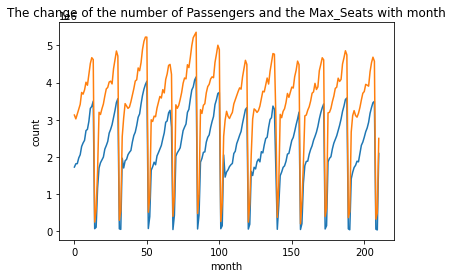

In [13]:
temp1 = df1[['Month','AustralianPort','Passengers_Total']]
temp3 = temp1.groupby(['Month','AustralianPort']).agg({"Passengers_Total":'sum'}).reset_index()
temp2 = df5[['Month','Australian_City','Max_Seats']]
temp4 = temp2.groupby(['Month','Australian_City']).agg({"Max_Seats":'sum'}).reset_index()
temp4.rename(columns={'Australian_City': 'AustralianPort'}, inplace=True)
temp5 = pd.merge(temp3,temp4,on = ['Month','AustralianPort'])
data1 = temp5.groupby('Month').Passengers_Total.sum().tolist()
data2 = temp5.groupby('Month').Max_Seats.sum().tolist()
import matplotlib.pyplot as plt
x = range(len(temp5["Month"].unique()))
plt.plot(x,data1,label='Passengers')
plt.plot(x,data2,label='Max_Seats')
plt.xlabel('month')
plt.ylabel('count')
plt.title('The change of the number of Passengers and the Max_Seats with month')
plt.show()